In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=RuntimeWarning, module='sklearn.linear_model._base')
warnings.filterwarnings("ignore", category=RuntimeWarning, module='sklearn.utils.extmath')
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')


In [106]:
# Read the data
x_train = pd.read_pickle('data/X_train_final.pkl')
x_test = pd.read_pickle('data/X_test_final.pkl')
y_train_motor = pd.read_pickle('data/y_train_motor.pkl')
y_train_total = pd.read_pickle('data/y_train_total.pkl')
y_test_motor = pd.read_pickle('data/y_test_motor.pkl')
y_test_total = pd.read_pickle('data/y_test_total.pkl')
y_train_common = pd.read_pickle('data/y_train_common.pkl')
y_test_common = pd.read_pickle('data/y_test_common.pkl')

In [107]:
x_test.columns

Index(['age_x_DFA', 'PPE test_time', 'PPE age', 'nonlinear_mean', 'PPE',
       'Jitter(%)', 'Shimmer(dB)', 'RPDE', 'Jitter(%) test_time', 'jitter_std',
       'sex', 'Jitter:PPQ5', 'NHR', 'noise_std', 'age test_time',
       'Jitter(%) PPE', 'Jitter:RAP', 'jitter_mean_x_shimmer_mean', 'age^2',
       'Jitter(Abs)', 'age', 'Shimmer', 'Jitter(%)_x_Shimmer', 'Shimmer:APQ3',
       'noise_mean', 'test_time', 'NHR_x_HNR', 'voice_instability',
       'RPDE_x_PPE', 'Shimmer:APQ11', 'nonlinear_std', 'Shimmer:APQ5', 'HNR',
       'Jitter(%) age', 'DFA', 'jitter_mean'],
      dtype='object')

In [108]:
x_test

,age_x_DFA,PPE test_time,PPE age,nonlinear_mean,PPE,Jitter(%),Shimmer(dB),RPDE,Jitter(%) test_time,jitter_std,...,NHR_x_HNR,voice_instability,RPDE_x_PPE,Shimmer:APQ11,nonlinear_std,Shimmer:APQ5,HNR,Jitter(%) age,DFA,jitter_mean
731,-0.176538,-1.700737,0.267875,0.954189,0.742527,1.566030,0.962254,1.179252,-1.578060,1.731205,...,1.840527,-0.008311,1.021264,0.739426,-0.219754,0.876907,-1.811732,0.959098,0.247560,1.690039
732,-0.195693,-1.533173,-0.070365,0.528469,0.114392,-0.100493,0.671890,0.913699,-1.538397,-0.305228,...,0.180917,-0.342493,0.432264,0.667301,0.358906,0.759172,-0.951649,-0.185045,0.144403,-0.272697
733,-0.429515,-1.109755,0.524351,0.587094,1.195919,1.096842,0.992418,0.934971,-1.066086,1.187751,...,1.641701,0.255903,1.285672,0.884120,-1.546804,1.117077,-1.333485,0.579495,-1.197017,1.127595
735,-0.174258,-0.818585,0.202361,0.070423,0.623578,0.543905,0.921023,-0.482974,-0.817638,0.397096,...,0.394703,0.205470,0.285666,0.823592,-0.760555,0.915092,-0.887072,0.199587,0.259773,0.429112
736,-0.191190,-0.648739,0.170685,0.076981,0.565602,1.198520,0.862378,-0.361796,-0.302174,1.134736,...,0.865076,0.533275,0.296389,0.627656,-0.747621,0.620146,-0.456132,0.656311,0.168739,1.130720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5858,-0.687726,0.963178,-0.237269,0.110873,0.194238,-0.349580,-0.816498,1.071159,0.535741,-0.496129,...,0.729097,-1.125181,0.549181,-0.666751,-0.319501,-0.567194,-0.029371,-0.498631,-1.482851,-0.538132
5859,-0.660149,0.194214,-0.802730,-0.888629,-1.065337,-1.018600,-0.233907,-0.102599,0.138439,-1.150598,...,-0.521144,-0.597341,-0.857092,-0.266474,0.125786,-0.347105,0.108245,-0.805272,-1.282666,-1.124242
5860,-0.628738,0.441763,-0.697631,-0.989917,-0.819393,-0.682459,0.027093,-0.568090,0.447155,-0.752307,...,0.358327,0.503027,-0.826022,-0.295056,-0.245660,-0.096013,0.698344,-0.655580,-1.058691,-0.705711
5861,-0.664525,0.516002,-0.694456,-0.589314,-0.812050,-1.128762,-1.178105,0.320576,0.187038,-1.101169,...,-0.962737,-1.003561,-0.520426,-0.972333,0.176487,-1.015470,0.522524,-0.852624,-1.314211,-1.081469


In [109]:
males = x_test[x_test['sex'] == 0]
females = x_test[x_test['sex'] == 1]

## Linear Regression

In [110]:
model_motor = LinearRegression()
model_motor.fit(x_train, y_train_motor)

model_total = LinearRegression()
model_total.fit(x_train, y_train_total)

y_pred_motor = model_motor.predict(x_test)
y_pred_total = model_total.predict(x_test)

mse_motor = mean_squared_error(y_test_motor, y_pred_motor)
mse_total = mean_squared_error(y_test_total, y_pred_total)
print(f"Mean Squared Error (Motor): {mse_motor}")
print(f"Mean Squared Error (Total): {mse_total}")
print(f"R2 Score (Motor): {r2_score(y_test_motor, y_pred_motor)}")
print(f"R2 Score (Total): {r2_score(y_test_total, y_pred_total)}")

Mean Squared Error (Motor): 46.22388987230743
Mean Squared Error (Total): 102.6847745219843
R2 Score (Motor): -0.4383547571822086
R2 Score (Total): -0.7611111672968625


### Check the SHAP for each gender

Motor Model SHAP Summary Plot


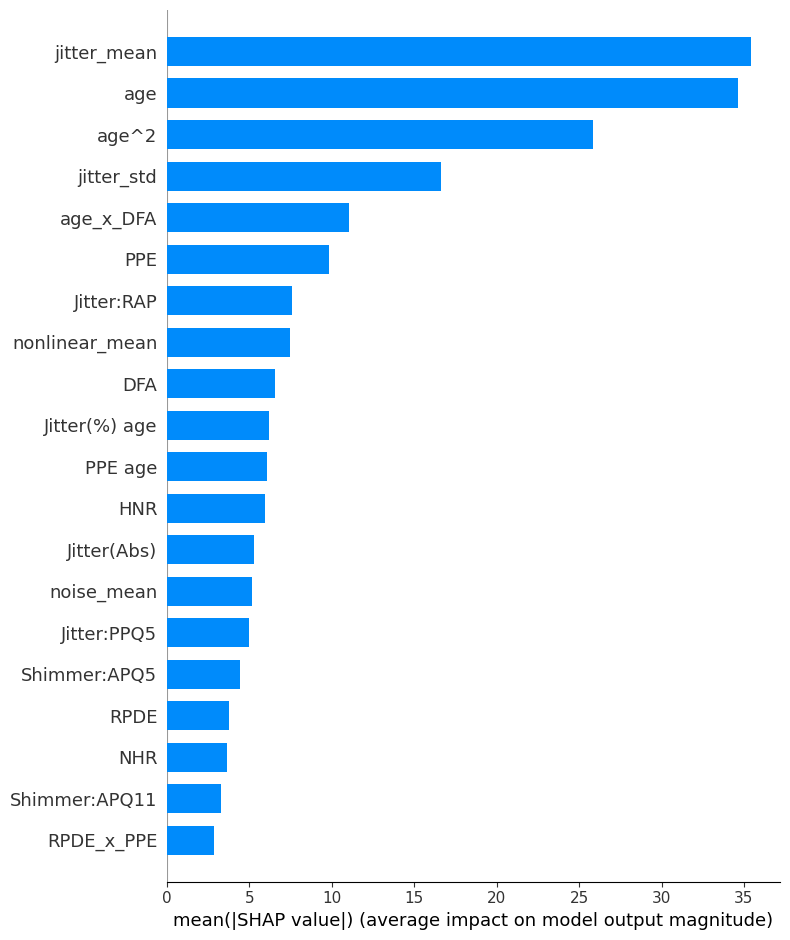

In [111]:
explainer_motor = shap.Explainer(model_motor, x_train)
shap_values_motor = explainer_motor(x_test)
shap_values_male = explainer_motor.shap_values(males)
shap_values_female = explainer_motor.shap_values(females)
print('Motor Model SHAP Summary Plot')
shap.summary_plot(shap_values_motor, x_test, plot_type="bar", show=False)

Motor Model SHAP Summary Plot for males


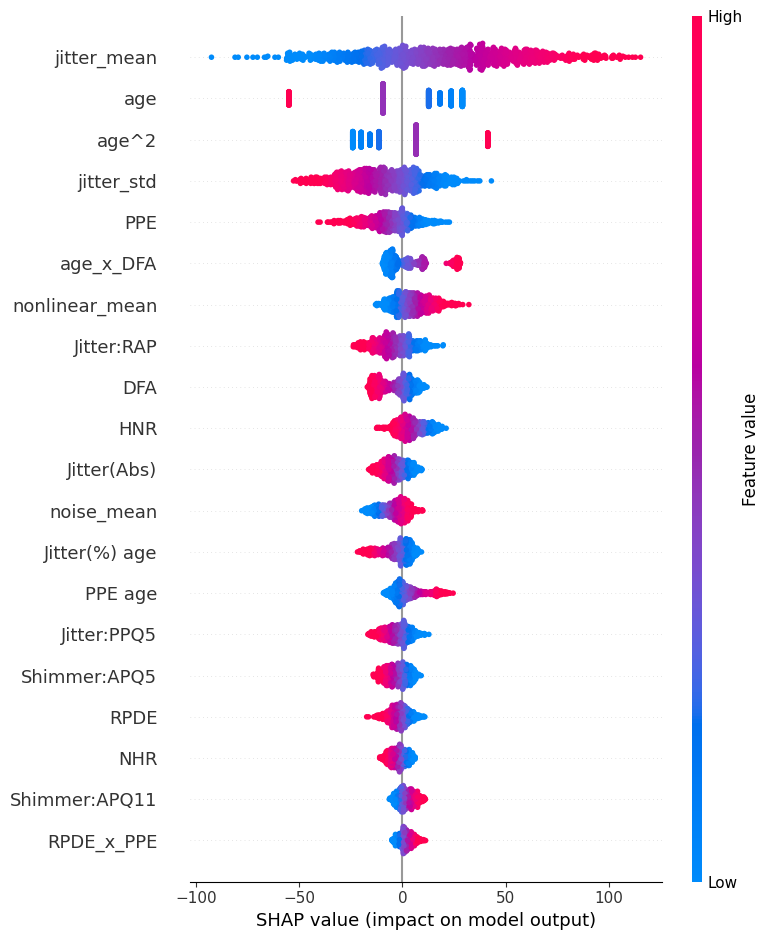

In [112]:
print('Motor Model SHAP Summary Plot for males')
shap.summary_plot(shap_values_male, males, show=False)

Motor Model SHAP Summary Plot for females


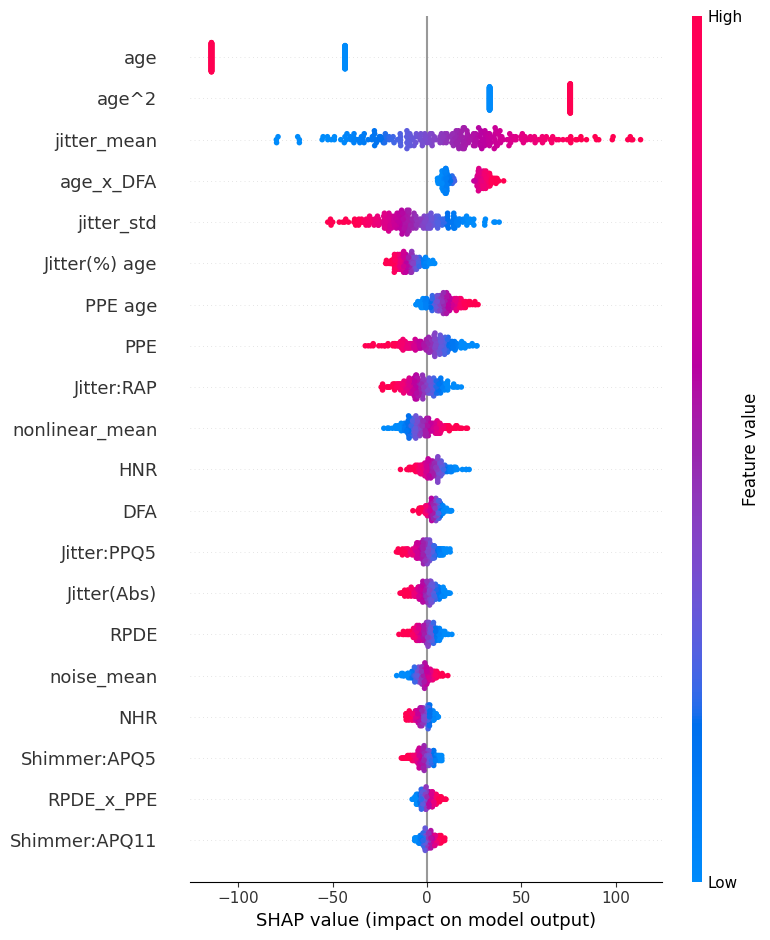

In [113]:
print('Motor Model SHAP Summary Plot for females')
shap.summary_plot(shap_values_female, females, show=False)

In [114]:
# Train the model only on males
males_train = x_train[x_train['sex'] == 0]
males_train_target = y_train_motor[x_train['sex'] == 0]

males_test = x_test[x_test['sex'] == 0]
males_test_target = y_test_motor[x_test['sex'] == 0]

model_motor_male = LinearRegression()
model_motor_male.fit(males_train, males_train_target)
y_pred_motor = model_motor_male.predict(males_test)
mse_motor = mean_squared_error(males_test_target, y_pred_motor)
print(f"Mean Squared Error (Motor, Males): {mse_motor}")
print(f"R2 Score (Motor, Males): {r2_score(males_test_target, y_pred_motor)}")


Mean Squared Error (Motor, Males): 61.81758697692402
R2 Score (Motor, Males): -0.6569016195980817


In [115]:
# Define females_train and females_train_target
females_train = x_train[x_train['sex'] == 1]
females_train_target = y_train_motor[x_train['sex'] == 1]

# Define females_test and females_test_target
females_test = x_test[x_test['sex'] == 1]
females_test_target = y_test_motor[x_test['sex'] == 1]

# Train and evaluate the model
model_motor_female = LinearRegression()
model_motor_female.fit(females_train, females_train_target)
y_pred_motor = model_motor_female.predict(females_test)
mse_motor = mean_squared_error(females_test_target, y_pred_motor)
print(f"Mean Squared Error (Motor, Females): {mse_motor}")
print(f"R2 Score (Motor, Females): {r2_score(females_test_target, y_pred_motor)}")

Mean Squared Error (Motor, Females): 1465.4592167849876
R2 Score (Motor, Females): -169.12812223688618


## Ridge Regression

In [116]:
ridge_motor = Ridge()
ridge_total = Ridge()

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search_ridge_motor = GridSearchCV(ridge_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge_total = GridSearchCV(ridge_total, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_ridge_motor.fit(x_train, y_train_motor)
grid_search_ridge_total.fit(x_train, y_train_total)
best_ridge_motor = grid_search_ridge_motor.best_estimator_
best_ridge_total = grid_search_ridge_total.best_estimator_
print(f"Best Ridge Motor Alpha: {best_ridge_motor.alpha}")
print(f"Best Ridge Total Alpha: {best_ridge_total.alpha}")

ridge_motor = Ridge(alpha=best_ridge_motor.alpha)
ridge_total = Ridge(alpha=best_ridge_total.alpha)

ridge_motor.fit(x_train, y_train_motor)
ridge_total.fit(x_train, y_train_total)

y_pred_motor_ridge = ridge_motor.predict(x_test)
y_pred_total_ridge = ridge_total.predict(x_test)
mse_motor_ridge = mean_squared_error(y_test_motor, y_pred_motor_ridge)
mse_total_ridge = mean_squared_error(y_test_total, y_pred_total_ridge)
print(f"Mean Squared Error (Motor Ridge): {mse_motor_ridge}")
print(f"Mean Squared Error (Total Ridge): {mse_total_ridge}")
print(f"R2 Score (Motor Ridge): {r2_score(y_test_motor, y_pred_motor_ridge)}")
print(f"R2 Score (Total Ridge): {r2_score(y_test_total, y_pred_total_ridge)}")

Best Ridge Motor Alpha: 1
Best Ridge Total Alpha: 1
Mean Squared Error (Motor Ridge): 44.33847785782169
Mean Squared Error (Total Ridge): 96.83084571177625
R2 Score (Motor Ridge): -0.3796861477731863
R2 Score (Total Ridge): -0.6607124524123007


In [ ]:
# Check what features ridge selected
ridge_motor_coef = pd.Series(ridge_motor.coef_, index=x_train.columns)
ridge_motor_coef = ridge_motor_coef[ridge_motor_coef != 0]
ridge_motor_coef = ridge_motor_coef.sort_values(ascending=False)
print("Ridge Motor Coefficients:")
print(ridge_motor_coef)

Ridge Motor Coefficients:
age^2                         29.106058
age_x_DFA                     10.745406
PPE age                        8.330807
nonlinear_mean                 7.185594
noise_mean                     5.946978
Jitter(%)                      5.544895
jitter_mean                    5.242266
Shimmer:APQ11                  4.252792
Jitter:RAP                     3.892898
Jitter(%) PPE                  3.538188
NHR_x_HNR                      2.445140
Shimmer:APQ3                   2.416368
RPDE_x_PPE                     1.637930
Jitter(%) test_time            1.187201
age test_time                  0.603434
Jitter:PPQ5                    0.533759
jitter_mean_x_shimmer_mean     0.251544
Jitter(%)_x_Shimmer           -0.114780
test_time                     -0.238594
PPE test_time                 -0.401106
voice_instability             -0.481369
Shimmer(dB)                   -1.116089
nonlinear_std                 -1.322761
Shimmer                       -1.500774
sex           

## Lasso Regression

In [117]:
lasso_motor = Lasso()
lasso_total = Lasso()

param_grid = {'alpha': [0.1, 1, 10, 100]}
grid_search_lasso_motor = GridSearchCV(lasso_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso_total = GridSearchCV(lasso_total, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search_lasso_motor.fit(x_train, y_train_motor)
grid_search_lasso_total.fit(x_train, y_train_total)
best_lasso_motor = grid_search_lasso_motor.best_estimator_
best_lasso_total = grid_search_lasso_total.best_estimator_
print(f"Best Lasso Motor Alpha: {best_lasso_motor.alpha}")
print(f"Best Lasso Total Alpha: {best_lasso_total.alpha}")

lasso_motor = Lasso(alpha=best_lasso_motor.alpha)
lasso_total = Lasso(alpha=best_lasso_total.alpha)

lasso_motor.fit(x_train, y_train_motor)
lasso_total.fit(x_train, y_train_total)

y_pred_motor_lasso = lasso_motor.predict(x_test)
y_pred_total_lasso = lasso_total.predict(x_test)
mse_motor_lasso = mean_squared_error(y_test_motor, y_pred_motor_lasso)
mse_total_lasso = mean_squared_error(y_test_total, y_pred_total_lasso)
print(f"Mean Squared Error (Motor Lasso): {mse_motor_lasso}")
print(f"Mean Squared Error (Total Lasso): {mse_total_lasso}")
print(f"R2 Score (Motor Lasso): {r2_score(y_test_motor, y_pred_motor_lasso)}")
print(f"R2 Score (Total Lasso): {r2_score(y_test_total, y_pred_total_lasso)}")

Best Lasso Motor Alpha: 1
Best Lasso Total Alpha: 1
Mean Squared Error (Motor Lasso): 44.34439911285188
Mean Squared Error (Total Lasso): 89.79094719921575
R2 Score (Motor Lasso): -0.37987040023148655
R2 Score (Total Lasso): -0.5399735800252117


## Support Vector Machine (SVM)

In [118]:
svm_motor = SVR()
svm_total = SVR()

param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svm_motor = GridSearchCV(svm_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svm_total = GridSearchCV(svm_total, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svm_motor.fit(x_train, y_train_motor)
grid_search_svm_total.fit(x_train, y_train_total)
best_svm_motor = grid_search_svm_motor.best_estimator_
best_svm_total = grid_search_svm_total.best_estimator_
print(f"Best SVM Motor C: {best_svm_motor.C}, Epsilon: {best_svm_motor.epsilon}, Kernel: {best_svm_motor.kernel}")
print(f"Best SVM Total C: {best_svm_total.C}, Epsilon: {best_svm_total.epsilon}, Kernel: {best_svm_total.kernel}")

svm_motor = SVR(C=best_svm_motor.C, epsilon=best_svm_motor.epsilon, kernel=best_svm_motor.kernel)
svm_total = SVR(C=best_svm_total.C, epsilon=best_svm_total.epsilon, kernel=best_svm_total.kernel)

svm_motor.fit(x_train, y_train_motor)
svm_total.fit(x_train, y_train_total)

y_pred_motor_svm = svm_motor.predict(x_test)
y_pred_total_svm = svm_total.predict(x_test)
mse_motor_svm = mean_squared_error(y_test_motor, y_pred_motor_svm)
mse_total_svm = mean_squared_error(y_test_total, y_pred_total_svm)
print(f"Mean Squared Error (Motor SVM): {mse_motor_svm}")
print(f"Mean Squared Error (Total SVM): {mse_total_svm}")
print(f"R2 Score (Motor SVM): {r2_score(y_test_motor, y_pred_motor_svm)}")
print(f"R2 Score (Total SVM): {r2_score(y_test_total, y_pred_total_svm)}")

Best SVM Motor C: 1, Epsilon: 0.2, Kernel: rbf
Best SVM Total C: 1, Epsilon: 0.01, Kernel: rbf
Mean Squared Error (Motor SVM): 69.74254900385885
Mean Squared Error (Total SVM): 111.96398208160264
R2 Score (Motor SVM): -1.1701879139732845
R2 Score (Total SVM): -0.9202556571492568


### SHAP

Motor SVM Model SHAP Summary Plot


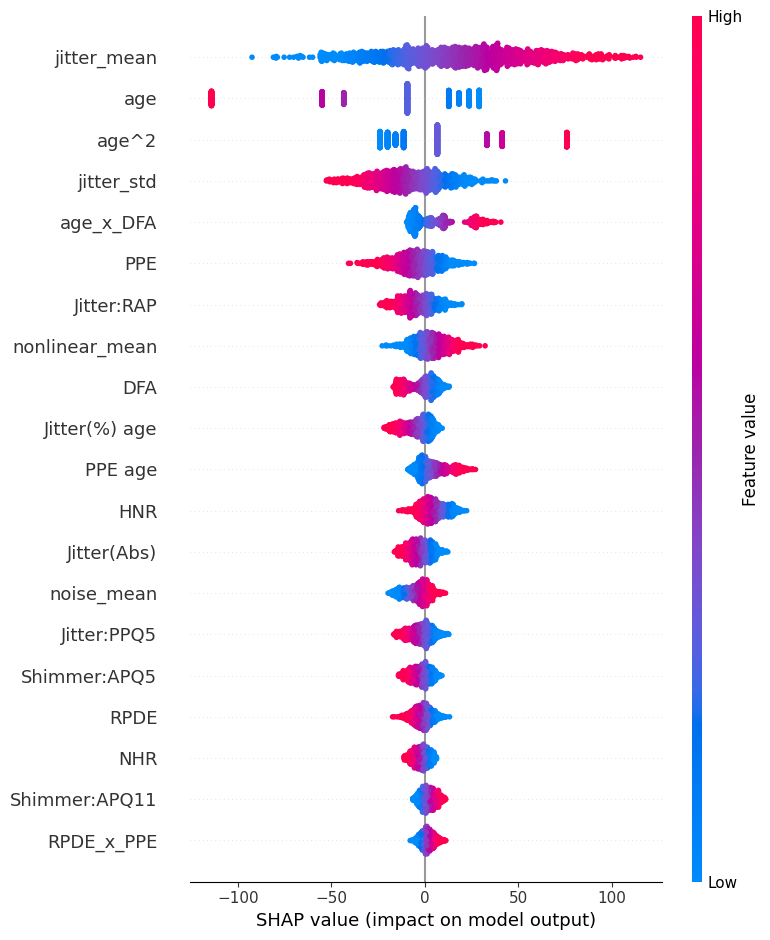

In [119]:
shap_values_motor_svm = explainer_motor.shap_values(x_test)
shap_values_motor_svm_male = explainer_motor.shap_values(males)
shap_values_motor_svm_female = explainer_motor.shap_values(females)
print('Motor SVM Model SHAP Summary Plot')
shap.summary_plot(shap_values_motor_svm, x_test, show=False)

Motor SVM Model SHAP Summary Plot for males


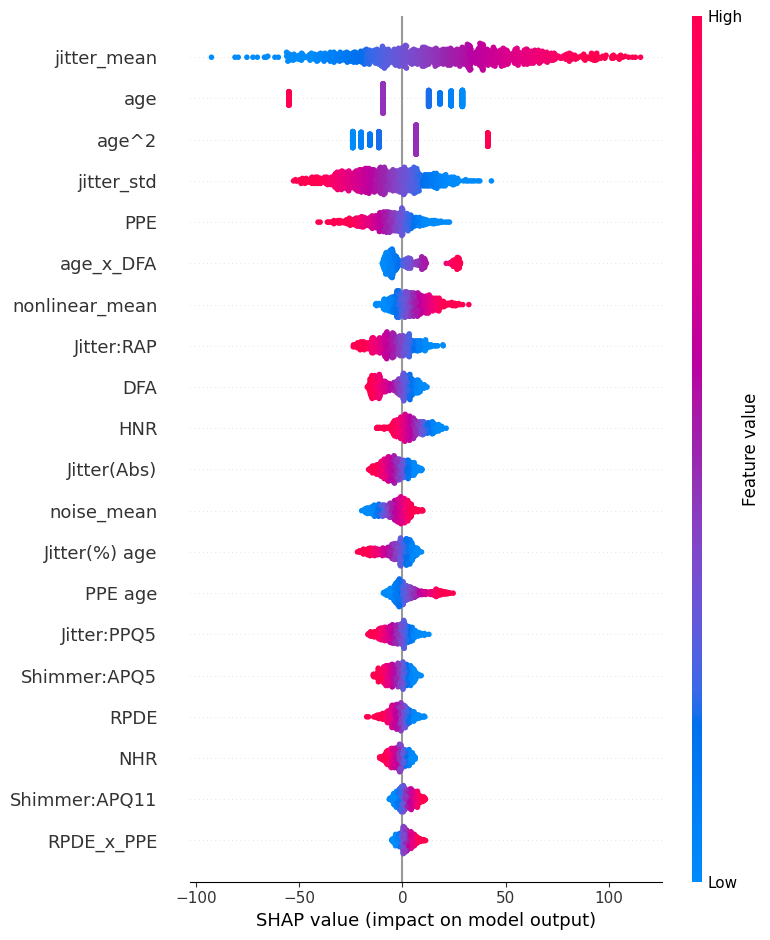

In [120]:
print('Motor SVM Model SHAP Summary Plot for males')
shap.summary_plot(shap_values_motor_svm_male, males, show=False)

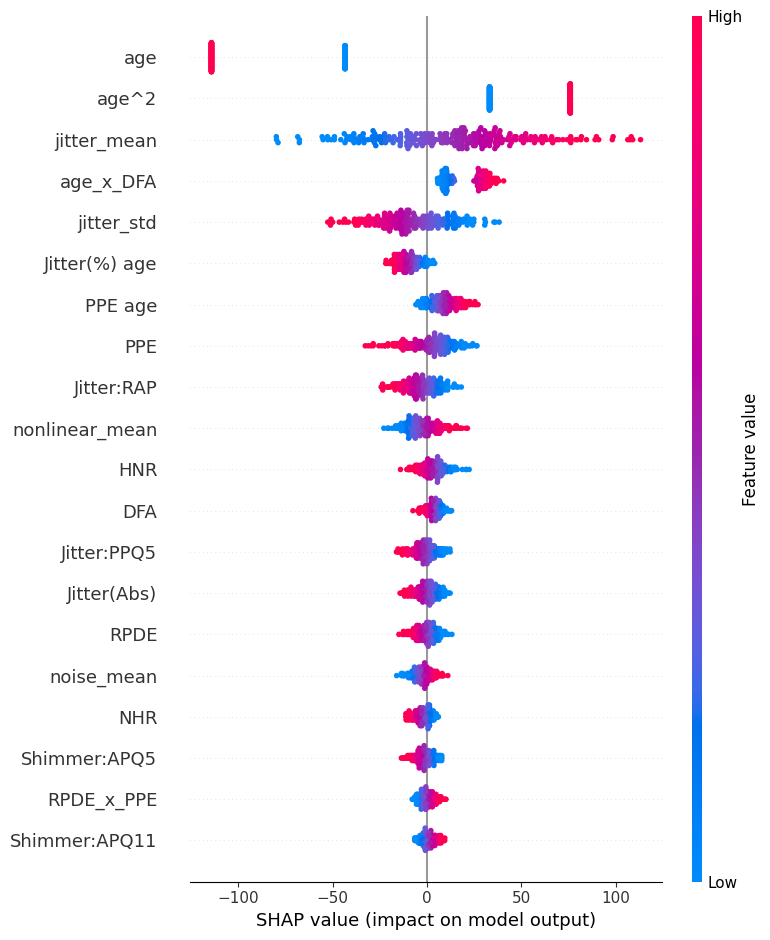

In [121]:
shap.summary_plot(shap_values_motor_svm_female, females, show=False)

## Random Forest Regression

In [122]:
rf_motor = RandomForestRegressor()
rf_total = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
    }
grid_search_rf_motor = RandomizedSearchCV(rf_motor, param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=10)
grid_search_rf_total = RandomizedSearchCV(rf_total, param_grid, cv=3, scoring='neg_mean_squared_error', n_iter=10)
grid_search_rf_motor.fit(x_train, y_train_motor)
grid_search_rf_total.fit(x_train, y_train_total)
best_rf_motor = grid_search_rf_motor.best_estimator_
best_rf_total = grid_search_rf_total.best_estimator_
print(f"Best RF Motor N_Estimators: {best_rf_motor.n_estimators}, Max_Depth: {best_rf_motor.max_depth}, Min_Samples_Split: {best_rf_motor.min_samples_split}, Min_Samples_Leaf: {best_rf_motor.min_samples_leaf}")
print(f"Best RF Total N_Estimators: {best_rf_total.n_estimators}, Max_Depth: {best_rf_total.max_depth}, Min_Samples_Split: {best_rf_total.min_samples_split}, Min_Samples_Leaf: {best_rf_total.min_samples_leaf}")

rf_motor = RandomForestRegressor(n_estimators=best_rf_motor.n_estimators, max_depth=best_rf_motor.max_depth, min_samples_split=best_rf_motor.min_samples_split, min_samples_leaf=best_rf_motor.min_samples_leaf)
rf_total = RandomForestRegressor(n_estimators=best_rf_total.n_estimators, max_depth=best_rf_total.max_depth, min_samples_split=best_rf_total.min_samples_split, min_samples_leaf=best_rf_total.min_samples_leaf)

rf_motor.fit(x_train, y_train_motor)
rf_total.fit(x_train, y_train_total)

y_pred_motor_rf = rf_motor.predict(x_test)
y_pred_total_rf = rf_total.predict(x_test)
mse_motor_rf = mean_squared_error(y_test_motor, y_pred_motor_rf)
mse_total_rf = mean_squared_error(y_test_total, y_pred_total_rf)
print(f"Mean Squared Error (Motor RF): {mse_motor_rf}")
print(f"Mean Squared Error (Total RF): {mse_total_rf}")
print(f"R2 Score (Motor RF): {r2_score(y_test_motor, y_pred_motor_rf)}")
print(f"R2 Score (Total RF): {r2_score(y_test_total, y_pred_total_rf)}")

/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/behnazrezaeifar/Documents/Documents - Behnaz’s MacBook Pro/biosignals/biosignal/lib/python3.11/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best RF Motor N_Estimators: 200, Max_Depth: 20, Min_Samples_Split: 5, Min_Samples_Leaf: 1
Best RF Total N_Estimators: 200, Max_Depth: 10, Min_Samples_Split: 5, Min_Samples_Leaf: 1
Mean Squared Error (Motor RF): 71.64881976958826
Mean Squared Error (Total RF): 135.02466285927463
R2 Score (Motor RF): -1.2295055878414654
R2 Score (Total RF): -1.315761443007815


## Gradient Boosting Regression

In [123]:
xgb_motor = xgb.XGBRegressor()
xgb_total = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search_xgb_motor = GridSearchCV(xgb_motor, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb_total = GridSearchCV(xgb_total, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search_xgb_motor.fit(x_train, y_train_motor)
grid_search_xgb_total.fit(x_train, y_train_total)
best_xgb_motor = grid_search_xgb_motor.best_estimator_
best_xgb_total = grid_search_xgb_total.best_estimator_
print(f"Best XGB Motor N_Estimators: {best_xgb_motor.n_estimators}, Max_Depth: {best_xgb_motor.max_depth}, Learning_Rate: {best_xgb_motor.learning_rate}, Subsample: {best_xgb_motor.subsample}")
print(f"Best XGB Total N_Estimators: {best_xgb_total.n_estimators}, Max_Depth: {best_xgb_total.max_depth}, Learning_Rate: {best_xgb_total.learning_rate}, Subsample: {best_xgb_total.subsample}")

xgb_motor = xgb.XGBRegressor(n_estimators=best_xgb_motor.n_estimators, max_depth=best_xgb_motor.max_depth, learning_rate=best_xgb_motor.learning_rate, subsample=best_xgb_motor.subsample)
xgb_total = xgb.XGBRegressor(n_estimators=best_xgb_total.n_estimators, max_depth=best_xgb_total.max_depth, learning_rate=best_xgb_total.learning_rate, subsample=best_xgb_total.subsample)

xgb_motor.fit(x_train, y_train_motor)
xgb_total.fit(x_train, y_train_total)

y_pred_motor_xgb = xgb_motor.predict(x_test)
y_pred_total_xgb = xgb_total.predict(x_test)
mse_motor_xgb = mean_squared_error(y_test_motor, y_pred_motor_xgb)
mse_total_xgb = mean_squared_error(y_test_total, y_pred_total_xgb)
print(f"Mean Squared Error (Motor XGB): {mse_motor_xgb}")
print(f"Mean Squared Error (Total XGB): {mse_total_xgb}")
print(f"R2 Score (Motor XGB): {r2_score(y_test_motor, y_pred_motor_xgb)}")
print(f"R2 Score (Total XGB): {r2_score(y_test_total, y_pred_total_xgb)}")

Best XGB Motor N_Estimators: 100, Max_Depth: 3, Learning_Rate: 0.01, Subsample: 0.8
Best XGB Total N_Estimators: 100, Max_Depth: 3, Learning_Rate: 0.01, Subsample: 0.8
Mean Squared Error (Motor XGB): 63.104165154214634
Mean Squared Error (Total XGB): 104.90345476106108
R2 Score (Motor XGB): -0.9636204654847551
R2 Score (Total XGB): -0.7991629871882571


## K-Nearest Neighbors

In [124]:
knn_motor = KNeighborsRegressor()
knn_total = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search_knn_motor = GridSearchCV(knn_motor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn_total = GridSearchCV(knn_total, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_knn_motor.fit(x_train, y_train_motor)
grid_search_knn_total.fit(x_train, y_train_total)
best_knn_motor = grid_search_knn_motor.best_estimator_
best_knn_total = grid_search_knn_total.best_estimator_
print(f"Best KNN Motor N_Neighbors: {best_knn_motor.n_neighbors}, Weights: {best_knn_motor.weights}, Algorithm: {best_knn_motor.algorithm}")
print(f"Best KNN Total N_Neighbors: {best_knn_total.n_neighbors}, Weights: {best_knn_total.weights}, Algorithm: {best_knn_total.algorithm}")

knn_motor = KNeighborsRegressor(n_neighbors=best_knn_motor.n_neighbors, weights=best_knn_motor.weights, algorithm=best_knn_motor.algorithm)
knn_total = KNeighborsRegressor(n_neighbors=best_knn_total.n_neighbors, weights=best_knn_total.weights, algorithm=best_knn_total.algorithm)

knn_motor.fit(x_train, y_train_motor)
knn_total.fit(x_train, y_train_total)

y_pred_motor_knn = knn_motor.predict(x_test)
y_pred_total_knn = knn_total.predict(x_test)
mse_motor_knn = mean_squared_error(y_test_motor, y_pred_motor_knn)
mse_total_knn = mean_squared_error(y_test_total, y_pred_total_knn)
print(f"Mean Squared Error (Motor KNN): {mse_motor_knn}")
print(f"Mean Squared Error (Total KNN): {mse_total_knn}")
print(f"R2 Score (Motor KNN): {r2_score(y_test_motor, y_pred_motor_knn)}")
print(f"R2 Score (Total KNN): {r2_score(y_test_total, y_pred_total_knn)}")

Best KNN Motor N_Neighbors: 9, Weights: uniform, Algorithm: auto
Best KNN Total N_Neighbors: 9, Weights: uniform, Algorithm: auto
Mean Squared Error (Motor KNN): 73.97664253620961
Mean Squared Error (Total KNN): 155.33233048726225
R2 Score (Motor KNN): -1.3019407498214783
R2 Score (Total KNN): -1.6640512494361777


## Cross Validation

Check if models are sensitive to the split (we want no dependecy)

In [125]:
cv_motor_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), x_train, y_train_motor, cv=5, scoring='neg_mean_squared_error')
cv_total_scores = cross_val_score(RandomForestRegressor(n_estimators=100, random_state=42), x_train, y_train_total, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE (Motor): {-cv_motor_scores.mean()}")
print(f"Cross-Validation MSE (Total): {-cv_total_scores.mean()}")

Cross-Validation MSE (Motor): 93.83802373147171
Cross-Validation MSE (Total): 149.1837104668436


## Model Comparison

Model Comparison MSE Scores:
Ridge Regression: 44.33847785782169
Lasso Regression: 44.34439911285188
Linear Regression: 46.22388987230743
XGBoost: 63.104165154214634
SVM: 69.74254900385885
Random Forest: 71.64881976958826
KNN: 73.97664253620961


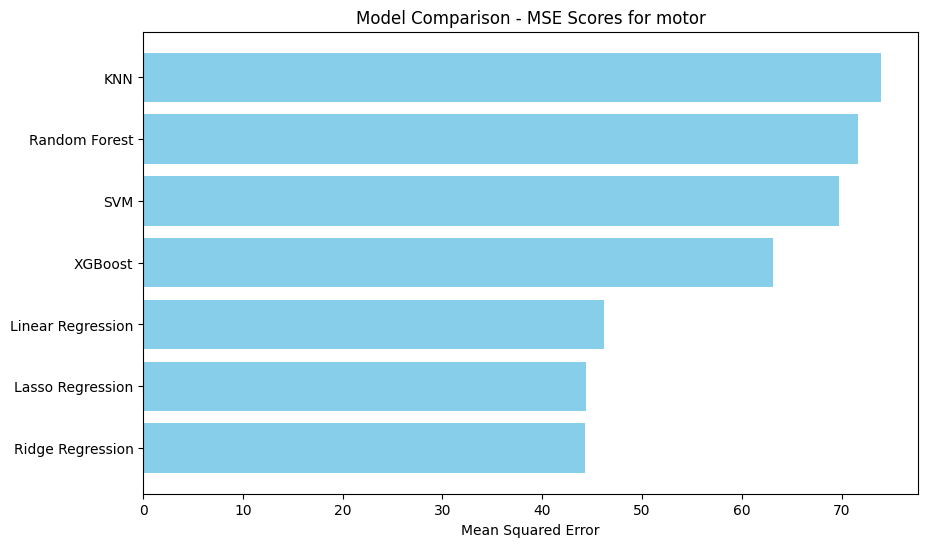

Model Comparison R2 Scores:
Ridge Regression: -0.3796861477731863
Lasso Regression: -0.37987040023148655
Linear Regression: -0.4383547571822086
XGBoost: -0.9636204654847551
SVM: -1.1701879139732845
Random Forest: -1.2295055878414654
KNN: -1.3019407498214783


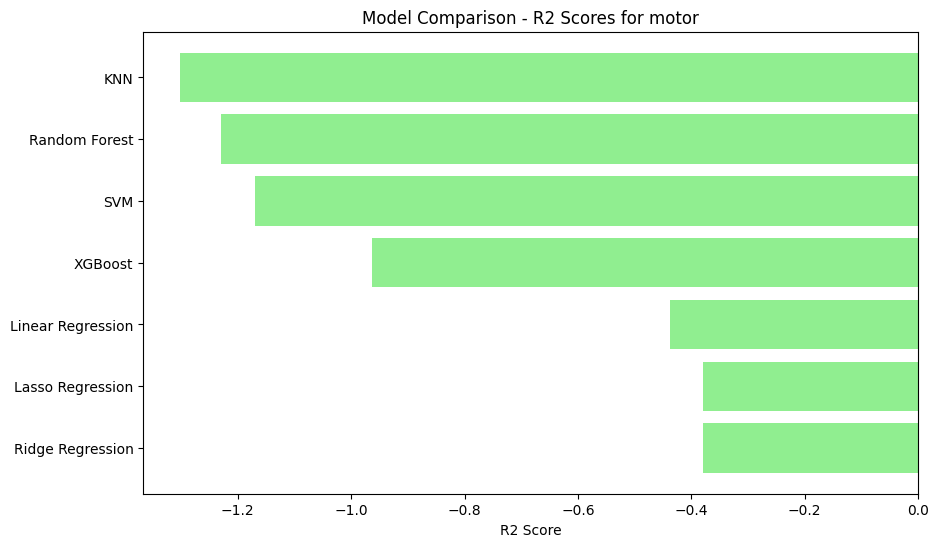

In [129]:
# Model comparison
models = {
    'Linear Regression': model_motor,
    'Ridge Regression': ridge_motor,
    'Lasso Regression': lasso_motor,
    'SVM': svm_motor,
    'Random Forest': rf_motor,
    'XGBoost': xgb_motor,
    'KNN': knn_motor
}
mse_scores = {}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test_motor, y_pred)
    mse_scores[model_name] = mse
mse_scores = dict(sorted(mse_scores.items(), key=lambda item: item[1]))
print("Model Comparison MSE Scores:")
for model_name, mse in mse_scores.items():
    print(f"{model_name}: {mse}")
# Plotting the MSE scores
plt.figure(figsize=(10, 6))
plt.barh(list(mse_scores.keys()), list(mse_scores.values()), color='skyblue')
plt.xlabel('Mean Squared Error')
plt.title('Model Comparison - MSE Scores for motor')
plt.show()

# plotting r2 scores
r2_scores = {}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test_motor, y_pred)
    r2_scores[model_name] = r2
r2_scores = dict(sorted(r2_scores.items(), key=lambda item: item[1], reverse=True))
print("Model Comparison R2 Scores:")
for model_name, r2 in r2_scores.items():
    print(f"{model_name}: {r2}")

plt.figure(figsize=(10, 6))
plt.barh(list(r2_scores.keys()), list(r2_scores.values()), color='lightgreen')
plt.xlabel('R2 Score')
plt.title('Model Comparison - R2 Scores for motor')
plt.show()
